In [3]:
import numpy as np
from matplotlib import pyplot as plt
from multifractal_analysis.double_trace_moment import get_alpha_c1_from_dtm
from multifractal_analysis.trace_moment import get_um_params_tm
from multifractal_analysis.cascade_simulations import discreat_um_sym

# Read the Data Used in the Tutorial

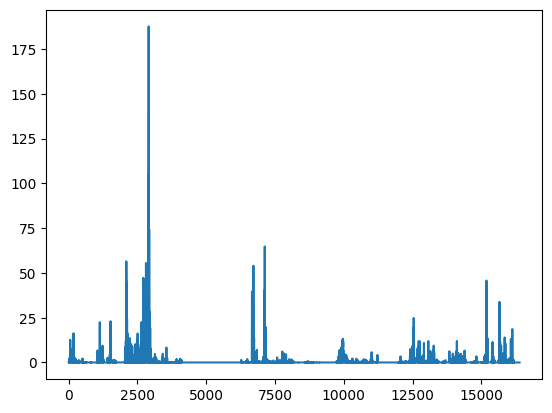

In [14]:
n = 14
alpha = 1.1
c1 = 0.28
data = discreat_um_sym(n, alpha, c1)
plt.plot(data)

In [17]:
q = 1.5
tm_alpha, tm_c1 = get_um_params_tm(data)
dtm_alpha, dtm_c1 = get_alpha_c1_from_dtm(data,q)
[[tm_alpha, dtm_alpha], [tm_c1, dtm_c1]]

[[1.1182974785077122, 1.2261954782745699],
 [0.2945636093277027, array([0.03805745])]]